In [42]:
pip install pystan==2.19.1.1 fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [43]:
pip install auto_ts


In [44]:
!pip install pystan==2.19.1.1
!pip install prophet


In [45]:
from auto_ts import auto_timeseries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
ps_data=pd.read_csv('/content/Alcohol_Sales.csv')
ps_data.head()
ps_data.tail()

,DATE,S4248SM144NCEN
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [47]:
ps_data.rename(columns={"S4248SM144NCEN":"Sales"},inplace=True)
date_column="DATE"
pred_column="Sales"
ps_data[date_column]=pd.to_datetime(ps_data[date_column], format='%Y-%m-%d')


In [48]:
ps_data[date_column].max()-ps_data[date_column].min()


Timedelta('9862 days 00:00:00')

In [49]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    325 non-null    datetime64[ns]
 1   Sales   325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [50]:
ps_data.dropna(inplace=True)

In [51]:
ps_data.set_index('DATE', inplace=True)

In [52]:
train_df=ps_data.iloc[:-24].copy()
test_df=ps_data.iloc[-24:].copy()

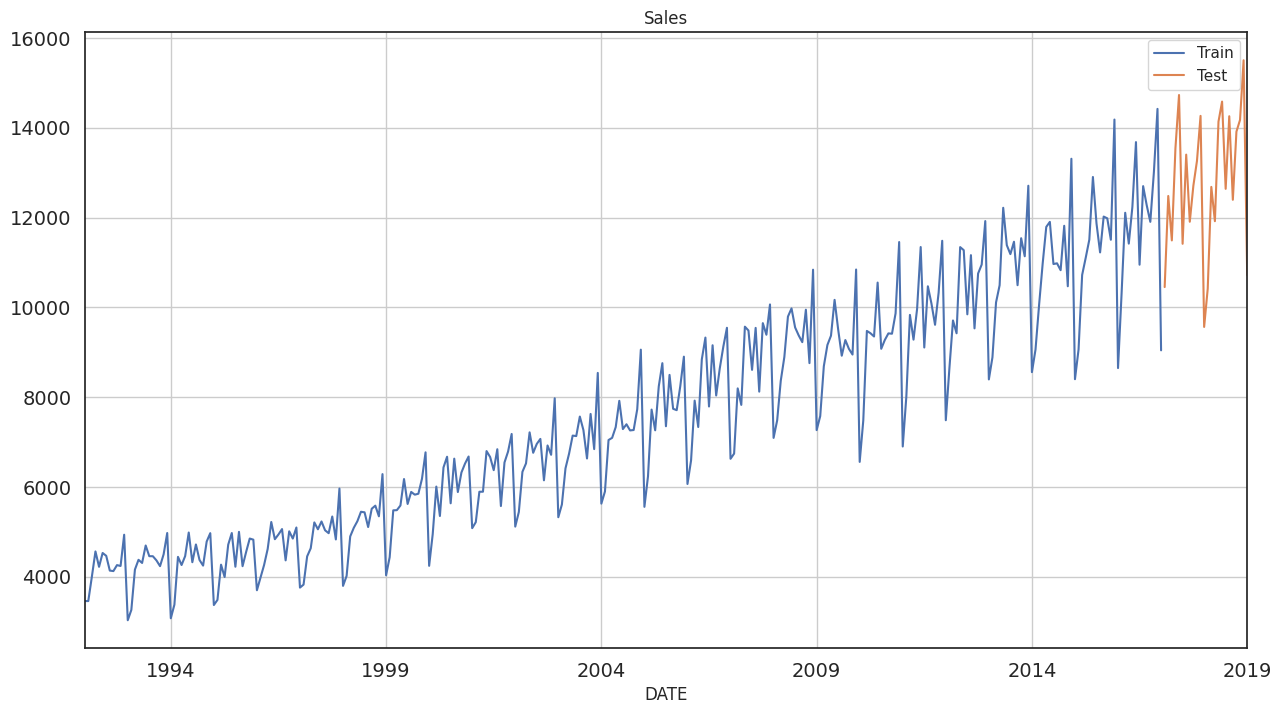

In [53]:
train_df[pred_column].plot(figsize=(15, 8), title=pred_column, fontsize=14, label='Train')
test_df[pred_column].plot(figsize=(15, 8), title=pred_column, fontsize=14, label='Test')

plt.legend()
plt.grid()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsip1c6dz/8ky78j6x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsip1c6dz/ovo8lufs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40042', 'data', 'file=/tmp/tmpsip1c6dz/8ky78j6x.json', 'init=/tmp/tmpsip1c6dz/ovo8lufs.json', 'output', 'file=/tmp/tmpsip1c6dz/prophet_modeljzeefa27/prophet_model-20240627082335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
08:23:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:23:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Start of Fit.....
    Target variable given as = Sales
Start of loading of data.....
    Inputs: ts_column = DATE, sep = ,, target = ['Sales']
    Using given input: pandas dataframe...
    train time series DATE column is the index on test data...
    train data shape = (301, 1)
Alert: Could not detect strf_time_format of DATE. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'scoretype': 'rmse'}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations 

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsip1c6dz/pqat00ju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsip1c6dz/9lldxcq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64861', 'data', 'file=/tmp/tmpsip1c6dz/pqat00ju.json', 'init=/tmp/tmpsip1c6dz/9lldxcq_.json', 'output', 'file=/tmp/tmpsip1c6dz/prophet_model2q4xi093/prophet_model-20240627082335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
08:23:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:23:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


    RMSE = 539.07
    Std Deviation of actuals = 1,044.29
    Normalized RMSE (as pct of std dev) = 52%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 205 Test Shape: 24
Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2960.477, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2933.830, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2874.428, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2958.550, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2873.864, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2874.674, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2873.390, Time=0.41 sec
 ARIMA(0,1,3)(0,0,0

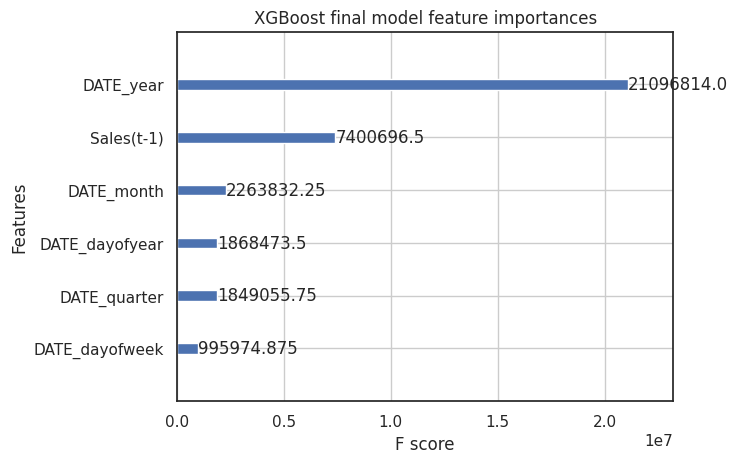

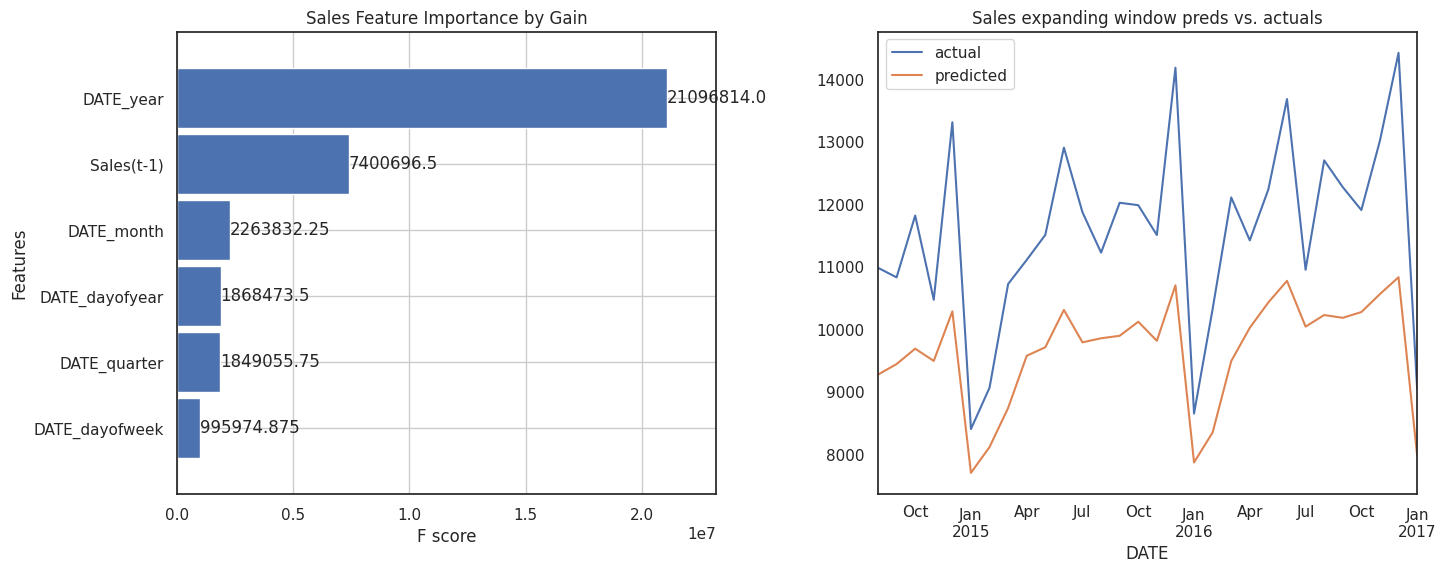

In [54]:
model=auto_timeseries(forecast_period=24,scoretype='rmse',time_interval='M',model_type='best',strf_time_format='%Y-%m-%d')
model.fit(train_df,ts_column=date_column,target=pred_column)


In [55]:
model.get_leaderboard()

,name,rmse
3,ML,2045.279275
0,Prophet,inf
1,auto_SARIMAX,inf
2,VAR,inf


In [56]:
future_predictions = model.predict(testdata=test_df, model='best')

future_predictions.tail()


Predicting using test dataframe shape = (24, 1) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for DATE. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date 

,yhat,mean_se,mean_ci_lower,mean_ci_upper
DATE,,,,
2018-09-01,10050.073242,NaN,NaN,NaN
2018-10-01,10588.810547,NaN,NaN,NaN
2018-11-01,10482.730469,NaN,NaN,NaN
2018-12-01,10989.589844,NaN,NaN,NaN
2019-01-01,8237.280273,NaN,NaN,NaN


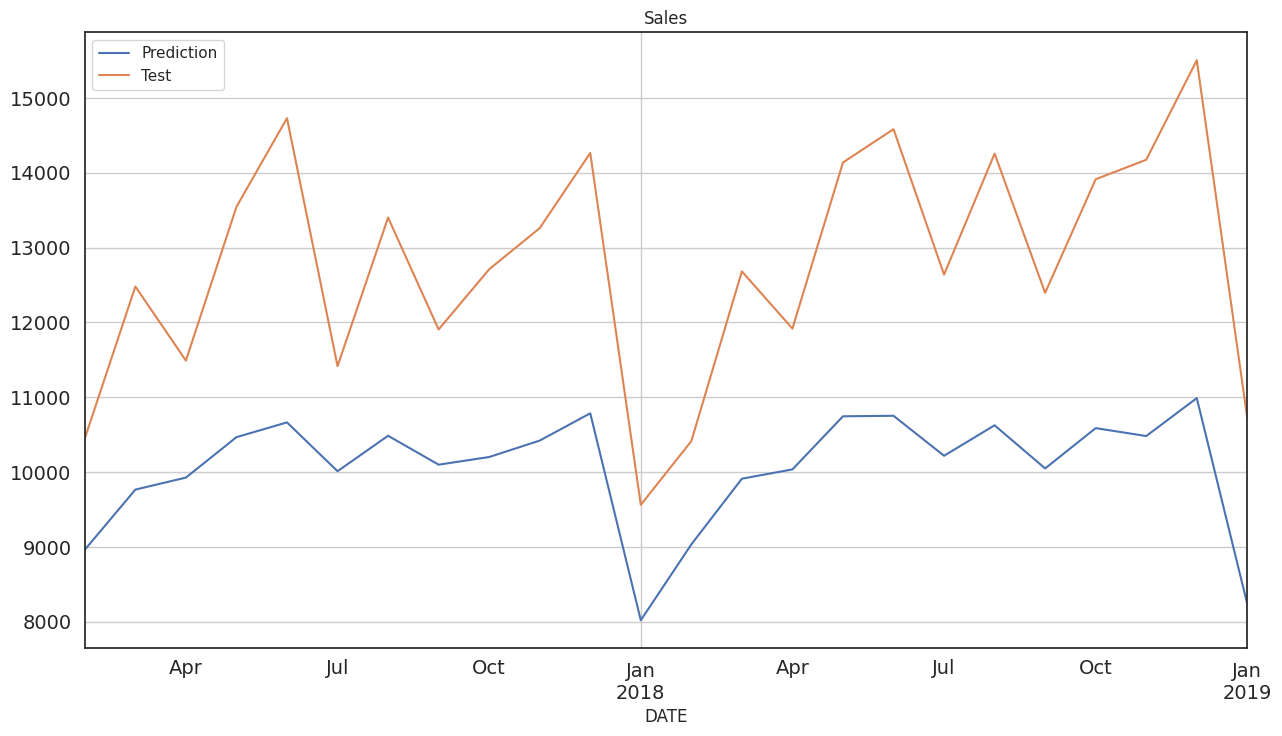

In [57]:
future_predictions['yhat'].plot(figsize=(15, 8), title=pred_column, fontsize=14, label='Prediction')
test_df[pred_column].plot(figsize=(15, 8), title=pred_column, fontsize=14, label='Test')

plt.legend()
plt.grid()
plt.show()